In [0]:
import pandas as pd
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten

Using TensorFlow backend.


In [0]:
!pip install -U -q PyDrive

    100% |████████████████████████████████| 993kB 20.9MB/s 


In [0]:
import pandas as pd
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten

In [0]:
from google.colab import files
uploaded = files.upload()


Saving currency_daily_BTC_CNY (1).csv to currency_daily_BTC_CNY (1).csv


In [0]:
data=pd.read_csv("currency_daily_BTC_CNY (1).csv")
data.head()

,timestamp,open (CNY),high (CNY),low (CNY),close (CNY),open (USD),high (USD),low (USD),close (USD),volume,market cap (USD)
0,2019-04-03,36579.606459,37337.266173,33347.115040,34209.630322,5440.654230,5563.343392,4970.949063,5097.242100,124.847322,6.363770e+05
1,2019-04-02,31113.943447,36587.158280,31098.460777,36587.158280,4635.946148,5441.777448,4633.639246,5441.777448,5451.446216,2.966556e+07
2,2019-04-01,30791.863008,31248.864005,30772.364322,31156.717159,4587.515547,4656.017929,4584.615159,4642.319388,4955.242631,2.300382e+07
3,2019-03-31,30690.550021,30791.526483,30656.396422,30791.526483,4572.489601,4587.465409,4567.401163,4587.465409,5319.489809,2.440298e+07
4,2019-03-30,30719.061815,30816.158697,30628.164930,30690.302659,4576.737485,4591.203647,4563.195041,4572.452748,6683.322670,3.055918e+07


In [0]:
df_data = pd.DataFrame(data, columns = ['timestamp','open (USD)', 'high (USD)',
                                            'low (USD)', 'close (USD)','volume'])

In [0]:
df_data

,timestamp,open (USD),high (USD),low (USD),close (USD),volume
0,2019-04-03,5440.654230,5563.343392,4970.949063,5097.242100,124.847322
1,2019-04-02,4635.946148,5441.777448,4633.639246,5441.777448,5451.446216
2,2019-04-01,4587.515547,4656.017929,4584.615159,4642.319388,4955.242631
3,2019-03-31,4572.489601,4587.465409,4567.401163,4587.465409,5319.489809
4,2019-03-30,4576.737485,4591.203647,4563.195041,4572.452748,6683.322670
5,2019-03-29,4498.189491,4582.192271,4497.563324,4576.447435,5921.879893
6,2019-03-28,4492.799843,4505.073779,4482.071307,4498.213516,4844.988941
7,2019-03-27,4402.760423,4504.194562,4399.353622,4499.575136,6112.207429
8,2019-03-26,4398.102572,4410.345862,4364.660095,4396.404874,5820.092172
9,2019-03-25,4463.511493,4469.392060,4366.251908,4399.005283,4754.827569


In [0]:
#Drop columns which contain only missing values
df_column_drop = data.dropna(axis=1, how='all')
df_column_drop

,timestamp,open (CNY),high (CNY),low (CNY),close (CNY),open (USD),high (USD),low (USD),close (USD),volume,market cap (USD)
0,2019-04-03,36579.606459,37337.266173,33347.115040,34209.630322,5440.654230,5563.343392,4970.949063,5097.242100,124.847322,6.363770e+05
1,2019-04-02,31113.943447,36587.158280,31098.460777,36587.158280,4635.946148,5441.777448,4633.639246,5441.777448,5451.446216,2.966556e+07
2,2019-04-01,30791.863008,31248.864005,30772.364322,31156.717159,4587.515547,4656.017929,4584.615159,4642.319388,4955.242631,2.300382e+07
3,2019-03-31,30690.550021,30791.526483,30656.396422,30791.526483,4572.489601,4587.465409,4567.401163,4587.465409,5319.489809,2.440298e+07
4,2019-03-30,30719.061815,30816.158697,30628.164930,30690.302659,4576.737485,4591.203647,4563.195041,4572.452748,6683.322670,3.055918e+07
5,2019-03-29,30313.519344,30762.089547,30240.134488,30717.115002,4498.189491,4582.192271,4497.563324,4576.447435,5921.879893,2.710117e+07
6,2019-03-28,30223.512880,30357.439527,30165.237249,30313.681254,4492.799843,4505.073779,4482.071307,4498.213516,4844.988941,2.179379e+07
7,2019-03-27,29567.601307,30300.166290,29544.722271,30269.090953,4402.760423,4504.194562,4399.353622,4499.575136,6112.207429,2.750234e+07
8,2019-03-26,29508.630192,29590.166583,29309.565906,29524.919376,4398.102572,4410.345862,4364.660095,4396.404874,5820.092172,2.558748e+07
9,2019-03-25,29986.316520,30012.862008,29294.899898,29514.686840,4463.511493,4469.392060,4366.251908,4399.005283,4754.827569,2.091651e+07


In [0]:
# Select the rows of where data is not NaN
df_notnull = data[data['open (USD)'].notnull()& data['high (USD)'].notnull()&data['low (USD)'].notnull()&data['close (USD)']]
df_notnull

,timestamp,open (CNY),high (CNY),low (CNY),close (CNY),open (USD),high (USD),low (USD),close (USD),volume,market cap (USD)
0,2019-04-03,36579.606459,37337.266173,33347.115040,34209.630322,5440.654230,5563.343392,4970.949063,5097.242100,124.847322,6.363770e+05
1,2019-04-02,31113.943447,36587.158280,31098.460777,36587.158280,4635.946148,5441.777448,4633.639246,5441.777448,5451.446216,2.966556e+07
2,2019-04-01,30791.863008,31248.864005,30772.364322,31156.717159,4587.515547,4656.017929,4584.615159,4642.319388,4955.242631,2.300382e+07
3,2019-03-31,30690.550021,30791.526483,30656.396422,30791.526483,4572.489601,4587.465409,4567.401163,4587.465409,5319.489809,2.440298e+07
4,2019-03-30,30719.061815,30816.158697,30628.164930,30690.302659,4576.737485,4591.203647,4563.195041,4572.452748,6683.322670,3.055918e+07
5,2019-03-29,30313.519344,30762.089547,30240.134488,30717.115002,4498.189491,4582.192271,4497.563324,4576.447435,5921.879893,2.710117e+07
6,2019-03-28,30223.512880,30357.439527,30165.237249,30313.681254,4492.799843,4505.073779,4482.071307,4498.213516,4844.988941,2.179379e+07
7,2019-03-27,29567.601307,30300.166290,29544.722271,30269.090953,4402.760423,4504.194562,4399.353622,4499.575136,6112.207429,2.750234e+07
8,2019-03-26,29508.630192,29590.166583,29309.565906,29524.919376,4398.102572,4410.345862,4364.660095,4396.404874,5820.092172,2.558748e+07
9,2019-03-25,29986.316520,30012.862008,29294.899898,29514.686840,4463.511493,4469.392060,4366.251908,4399.005283,4754.827569,2.091651e+07


In [0]:
df_column_drop.shape

(1829, 11)

In [0]:
df_notnull.shape

(1829, 11)

#Visualization of Data

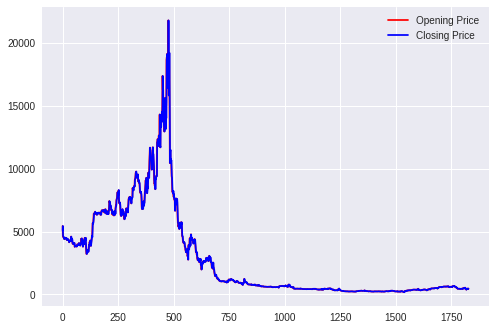

In [191]:
#plt.plot(data['timestamp'])
import matplotlib.pyplot as plt
plt.plot(data['open (USD)'],color = 'red', label = 'Opening Price')
plt.plot(data['close (USD)'],color = 'blue', label = 'Closing Price')
plt.legend()

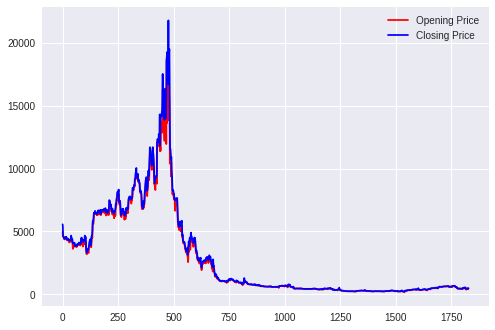

In [190]:
plt.plot(data['low (USD)'],color = 'red', label = 'Opening Price')
plt.plot(data['high (USD)'],color = 'blue', label = 'Closing Price')
plt.legend()

In [0]:
# train_data=data[data.iloc[:,0]<'2018-08-01']
# train_data=train_data.iloc[::-1]
train_data=df_data[df_data.iloc[:,0]<'2018-08-01']
train_data=train_data.iloc[::-1]

In [0]:
train_data

,timestamp,open (USD),high (USD),low (USD),close (USD),volume
1828,2014-04-01,453.427610,470.555968,453.427610,461.291035,5628.021147
1827,2014-04-02,462.040758,479.549854,412.794639,413.373127,10525.594058
1826,2014-04-03,413.708292,431.963432,390.367443,427.277406,10340.816260
1825,2014-04-04,427.619393,443.057454,416.402600,434.897325,7436.238665
1824,2014-04-05,435.229041,453.639887,433.029637,453.639887,4306.278920
1823,2014-04-06,454.793619,463.091501,448.497672,456.916941,2989.022883
1822,2014-04-07,456.909800,457.205736,442.439890,442.439890,2459.677864
1821,2014-04-08,442.251162,458.015130,439.975615,446.408216,2690.792538
1820,2014-04-09,447.442126,450.723601,437.832610,439.049445,2684.598329
1819,2014-04-10,438.919044,440.943196,371.272280,374.371752,9165.370857


In [0]:
train_data.shape

(1583, 11)

In [0]:

test_data=df_data[df_data.iloc[:,0]>='2018-08-01']
test_data=test_data.iloc[::-1]
test_data


,timestamp,open (USD),high (USD),low (USD),close (USD),volume
245,2018-08-01,7735.259953,7739.214198,7494.445633,7610.710438,3180.727396
244,2018-08-02,7611.141780,7704.163578,7518.245073,7573.671220,2947.218613
243,2018-08-03,7571.942495,7571.942495,7350.484011,7448.263114,2930.635533
242,2018-08-04,7448.702193,7522.726036,7035.762769,7118.222238,3606.667739
241,2018-08-05,7079.666899,7151.230268,6969.687492,7090.635714,3557.159959
240,2018-08-06,7090.605327,7190.160994,6898.468754,6944.256373,3570.892777
239,2018-08-07,6951.946026,7179.972410,6801.742455,6841.570209,3759.451440
238,2018-08-08,6852.121081,6852.121081,6266.411678,6403.835588,4674.972055
237,2018-08-09,6407.307832,6716.153012,6336.539026,6651.838286,4019.068526
236,2018-08-10,6624.853198,6687.155877,6225.306664,6325.644008,4347.784085


In [0]:
test_data.shape

(246, 6)

In [0]:
test_data=test_data.iloc[::-1]
test_data

,timestamp,open (USD),high (USD),low (USD),close (USD),volume
0,2019-04-03,5440.654230,5563.343392,4970.949063,5097.242100,124.847322
1,2019-04-02,4635.946148,5441.777448,4633.639246,5441.777448,5451.446216
2,2019-04-01,4587.515547,4656.017929,4584.615159,4642.319388,4955.242631
3,2019-03-31,4572.489601,4587.465409,4567.401163,4587.465409,5319.489809
4,2019-03-30,4576.737485,4591.203647,4563.195041,4572.452748,6683.322670
5,2019-03-29,4498.189491,4582.192271,4497.563324,4576.447435,5921.879893
6,2019-03-28,4492.799843,4505.073779,4482.071307,4498.213516,4844.988941
7,2019-03-27,4402.760423,4504.194562,4399.353622,4499.575136,6112.207429
8,2019-03-26,4398.102572,4410.345862,4364.660095,4396.404874,5820.092172
9,2019-03-25,4463.511493,4469.392060,4366.251908,4399.005283,4754.827569


In [0]:
training_set = train_data.iloc[:, 1:2].values
training_set

array([[ 453.42760964],
       [ 462.04075834],
       [ 413.7082918 ],
       ...,
       [8119.19642512],
       [8104.8479595 ],
       [8094.60012089]])

In [0]:
import numpy as np
training_set=np.flipud(training_set) 

In [147]:

real_coin_price = test_data.iloc[:, 1:2].values
real_coin_price

array([[7735.25995333],
       [7611.14178003],
       [7571.94249546],
       [7448.70219278],
       [7079.66689921],
       [7090.60532738],
       [6951.94602561],
       [6852.12108072],
       [6407.30783205],
       [6624.85319785],
       [6323.95711134],
       [6380.92268669],
       [6458.64221571],
       [6394.63114408],
       [6268.26909235],
       [6318.73770937],
       [6371.48749394],
       [6582.65587936],
       [6459.22361346],
       [6516.93351987],
       [6333.31508169],
       [6509.29582213],
       [6411.64334098],
       [6499.45834763],
       [6707.3598878 ],
       [6734.45307691],
       [6692.59558905],
       [6792.09984954],
       [7009.17553631],
       [7049.79686843],
       [7055.20341192],
       [7062.94695219],
       [7240.74825745],
       [7330.87510408],
       [7315.57676948],
       [7422.76668213],
       [6907.43672068],
       [6697.50148751],
       [6571.41245464],
       [6394.33223014],
       [6404.27875041],
       [6460.370

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [149]:
training_set_scaled.shape

(1583, 1)

In [0]:
import numpy as np
X_train = []
y_train = []
for i in range(60, 1405):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [151]:
X_train.shape

(1345, 60)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [153]:
X_train.shape

(1345, 60, 1)

In [154]:
X_train

array([[[0.36636468],
        [0.36683865],
        [0.36750227],
        ...,
        [0.35112059],
        [0.34750039],
        [0.34034655]],

       [[0.36683865],
        [0.36750227],
        [0.36473122],
        ...,
        [0.34750039],
        [0.34034655],
        [0.34093897]],

       [[0.36750227],
        [0.36473122],
        [0.35616219],
        ...,
        [0.34034655],
        [0.34093897],
        [0.33818612]],

       ...,

       [[0.00912061],
        [0.00938009],
        [0.00948919],
        ...,
        [0.00993413],
        [0.00944239],
        [0.00942479]],

       [[0.00938009],
        [0.00948919],
        [0.00890392],
        ...,
        [0.00944239],
        [0.00942479],
        [0.01038327]],

       [[0.00948919],
        [0.00890392],
        [0.00822678],
        ...,
        [0.00942479],
        [0.01038327],
        [0.01062573]]])

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,GRU
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.recurrent import LSTM, GRU
from keras.layers import Convolution1D, MaxPooling1D, AtrousConvolution1D, RepeatVector
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from keras.layers.wrappers import Bidirectional
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import *
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.initializers import *

In [0]:
regressor = Sequential()

In [0]:
regressor.add(Bidirectional(LSTM(units = 50, return_sequences = True,input_shape = (X_train.shape[1], 1))))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(Bidirectional(LSTM(units = 50, return_sequences = True)))
regressor.add(Dropout(0.2))

In [0]:
# adding lstm layers
regressor.add(Bidirectional(LSTM(units = 50)))
regressor.add(Dropout(0.2))

In [0]:

regressor.add(Dense(32,kernel_initializer="uniform",activation='relu'))
regressor.add(Dense(1,kernel_initializer="uniform",activation='linear'))

In [0]:

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [169]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 256)

Epoch 1/100
1345/1345 [==============================] - 12s 9ms/step - loss: 0.0407
Epoch 2/100
1345/1345 [==============================] - 6s 4ms/step - loss: 0.0311
Epoch 3/100
1345/1345 [==============================] - 6s 5ms/step - loss: 0.0185
Epoch 4/100
1345/1345 [==============================] - 6s 5ms/step - loss: 0.0071
Epoch 5/100
1345/1345 [==============================] - 6s 5ms/step - loss: 0.0032
Epoch 6/100
1345/1345 [==============================] - 6s 4ms/step - loss: 0.0028
Epoch 7/100
1345/1345 [==============================] - 6s 5ms/step - loss: 0.0024
Epoch 8/100
1345/1345 [==============================] - 6s 4ms/step - loss: 0.0018
Epoch 9/100
1345/1345 [==============================] - 6s 4ms/step - loss: 0.0016
Epoch 10/100
1345/1345 [==============================] - 6s 4ms/step - loss: 0.0015
Epoch 11/100
1345/1345 [==============================] - 6s 4ms/step - loss: 0.0012
Epoch 12/100
1345/1345 [==============================] - 6s 4ms/step - l

In [0]:
import pandas as pd
dataset_total = pd.concat((train_data['open (USD)'], test_data['open (USD)']), axis = 0)

In [0]:
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)

In [172]:
inputs

array([[7532.05392557],
       [7686.72948372],
       [7765.00289909],
       [7659.97037108],
       [7571.36049933],
       [7672.41286474],
       [7722.29988833],
       [7611.05905442],
       [7590.02608812],
       [7182.55390901],
       [7019.4425248 ],
       [6785.71505482],
       [6518.77712403],
       [6774.96250247],
       [6551.85647068],
       [6644.57954078],
       [6605.29232892],
       [6827.99077466],
       [6817.91941725],
       [6838.83536883],
       [6796.2625477 ],
       [6230.47937217],
       [6311.6141731 ],
       [6314.08910992],
       [6374.32041719],
       [6203.77197341],
       [6220.93291423],
       [5975.86092628],
       [6252.97697143],
       [6424.069703  ],
       [6359.95985096],
       [6573.64134976],
       [6563.67788901],
       [6658.0544844 ],
       [6617.12588969],
       [6649.37031451],
       [6769.97680449],
       [6703.00904719],
       [6691.34884747],
       [6318.356174  ],
       [6377.25855161],
       [6259.915

In [173]:
len(inputs)

306

In [0]:
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 127):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_coin_price = regressor.predict(X_test)
predicted_coin_price = sc.inverse_transform(predicted_coin_price)

In [175]:
XTest=np.reshape(X_test[0],(1,60,1))
X_test.shape

(67, 60, 1)

In [0]:
predicted=[]
for i in range(30):

  p=sc.inverse_transform(regressor.predict(XTest))
  predicted.append(sc.inverse_transform(regressor.predict(XTest)))
  XTest=np.reshape(XTest,(60))
  XTest=np.delete(XTest,0)
  XTest=np.append(XTest,sc.transform(p))
  XTest=np.reshape(XTest,(1,60,1))

In [177]:
predicted_coin_price

array([[7888.214 ],
       [7791.635 ],
       [7655.7534],
       [7512.566 ],
       [7355.692 ],
       [7140.5693],
       [6956.4087],
       [6779.54  ],
       [6621.454 ],
       [6410.7197],
       [6285.192 ],
       [6138.8896],
       [6041.0635],
       [5993.695 ],
       [5962.2573],
       [5926.85  ],
       [5917.245 ],
       [5930.3667],
       [5995.086 ],
       [6037.312 ],
       [6087.977 ],
       [6093.0576],
       [6126.3887],
       [6131.3467],
       [6147.155 ],
       [6201.6616],
       [6257.9917],
       [6298.919 ],
       [6353.032 ],
       [6445.3115],
       [6537.5854],
       [6618.688 ],
       [6686.205 ],
       [6776.1895],
       [6870.23  ],
       [6944.1147],
       [7023.163 ],
       [6972.2163],
       [6858.59  ],
       [6711.1357],
       [6531.51  ],
       [6369.8784],
       [6245.263 ],
       [6144.633 ],
       [6074.856 ],
       [6060.308 ],
       [6078.967 ],
       [6123.553 ],
       [6160.1196],
       [6168.6587],


In [178]:
real_coin_price

array([[7735.25995333],
       [7611.14178003],
       [7571.94249546],
       [7448.70219278],
       [7079.66689921],
       [7090.60532738],
       [6951.94602561],
       [6852.12108072],
       [6407.30783205],
       [6624.85319785],
       [6323.95711134],
       [6380.92268669],
       [6458.64221571],
       [6394.63114408],
       [6268.26909235],
       [6318.73770937],
       [6371.48749394],
       [6582.65587936],
       [6459.22361346],
       [6516.93351987],
       [6333.31508169],
       [6509.29582213],
       [6411.64334098],
       [6499.45834763],
       [6707.3598878 ],
       [6734.45307691],
       [6692.59558905],
       [6792.09984954],
       [7009.17553631],
       [7049.79686843],
       [7055.20341192],
       [7062.94695219],
       [7240.74825745],
       [7330.87510408],
       [7315.57676948],
       [7422.76668213],
       [6907.43672068],
       [6697.50148751],
       [6571.41245464],
       [6394.33223014],
       [6404.27875041],
       [6460.370

#Result

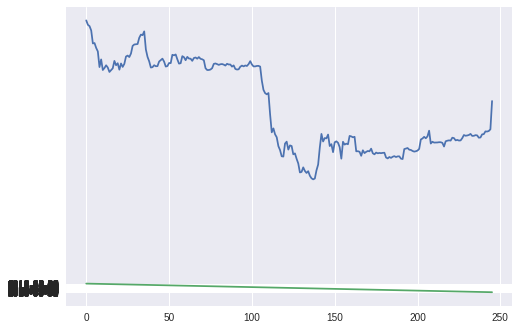

In [179]:
plt.plot(real_coin_price)
plt.plot(test_data['timestamp'])

([<matplotlib.axis.XTick at 0x7f964601b9b0>,
 <a list of 67 Text xticklabel objects>)

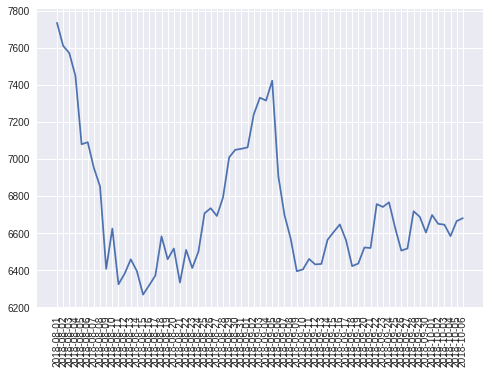

In [180]:

plt.plot(real_coin_price[0:67])
plt.xticks(np.arange(67),test_data['timestamp'], rotation='vertical')

([<matplotlib.axis.XTick at 0x7f9645f754e0>,
 <a list of 67 Text xticklabel objects>)

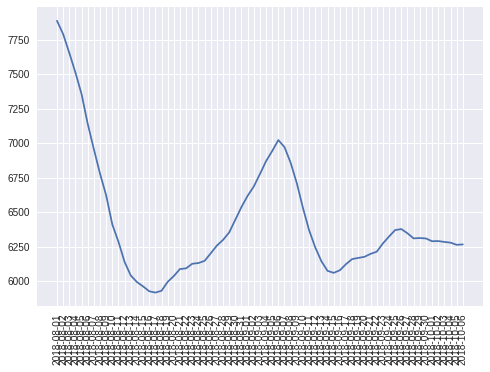

In [181]:

plt.plot(predicted_coin_price)
plt.xticks(np.arange(67),test_data['timestamp'], rotation='vertical')

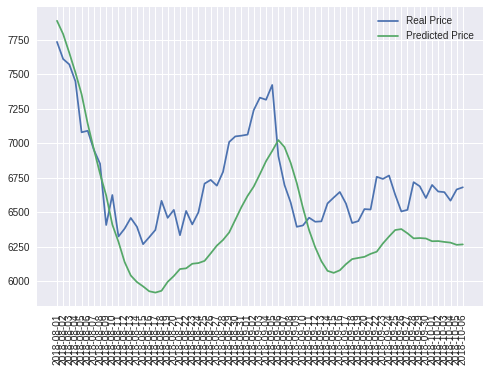

In [193]:
plt.plot(real_coin_price[0:67],label = 'Real Price')
plt.plot(predicted_coin_price,label = 'Predicted Price')
plt.xticks(np.arange(67),test_data['timestamp'], rotation='vertical')
plt.legend()